# Indian Startups Case-Study

Problem Statement:<br>
Given Indian Startup Funding Data, the aim is to draw insights to facilitate the setting up of a new startup.<br>

Questions to be addressed:<br>
1.Based on the number of fundings received in a location, use dataset to make an informed decision to choose a location for startup among Bangalore, Mumbai, and NCR( Gurgaon, Noida and New Delhi) to maximize chances of getting fundings.<br>
<br>
2.Obtain a list of potential investors, who should be contacted by finding the investors who have invested maximum number of times in same or different startups.<br>
<br>
3.Obtain a list of potential investors, to be contacted, by analyzing the frequency of their investments in different startups.
(Multiple rounds of funding to the same startup should be counted first)<br>
<br>
4.For initial stages of the startup, focus on getting 'Crowd Funding' or 'Seed Funding'. Draw out a list of investors who have been investing heavily in different startups under this umbrella.<br>
<br>
5.Once the startup is more stable, focus on getting fund under 'Private Equity'. Draw out a list of investors who have been investing heavily in different startups under this umbrella.<br> 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#read the csv file into pd dataframe
df_og=pd.read_csv('DataSets/old_startup_funding.csv')
df_og.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


# 1. Optimal Location

Aim: Finding the location where startups has received funding maximum number of times among Bangalore, Mumbai and NCR( Gurgaon, Noida and <br>New Delhi) to maximize chances of getting funding for a new startup.

In [4]:
#Create a pandas series containing all locations that received funding.
Cities=df_og['CityLocation']
#Drop the rows with nan entries
Cities.dropna(inplace=True)


In [5]:
#Cleaning Data according to requirement
#replace bangalore with Bangalore
Cities[Cities.str.contains('bangalore',case=False)]='Bangalore'   #add exp for fn choice


#replace Delhi with New Delhi
Cities[Cities.str.contains('delhi',case=False)]='New Delhi'     

#replace mumbai with Mumbai
Cities[Cities.str.contains('mumbai',case=False)]='Mumbai'

#Group together New Delhi, Gurgaon and Noida under a single unit 'NCR'
Cities[Cities.str.contains('gurgaon',case=False)]='NCR'
Cities[Cities.str.contains('noida',case=False)]='NCR'
Cities[Cities.str.contains('new delhi',case=False)]='NCR'


In [6]:
#Get no of times each loaction has got funding
count_per_location=Cities.value_counts()

In [47]:
#Our prefered locations
Locations=['Bangalore','Mumbai','NCR']
#Respective counts
counts=[count_per_location[i] for i in Locations]
counts

[637, 449, 709]

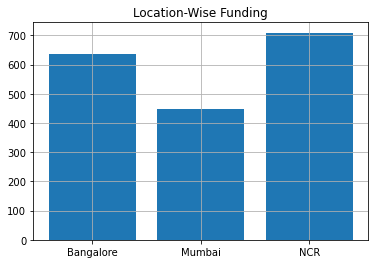

In [8]:
#Plotting bar graphs to visualize no of fundings received by each loaction
plt.bar(Locations,counts)
plt.title('Location-Wise Funding')
plt.grid()
plt.show()

Conclusion: It is evident from the graph that NCR has seen most rounds of fundings over the years hence this location should be prefered.

# 2. Top Investors with maximum rounds of Investment

Aim: Finding the top 5 investors who have invested maximum number of times to increase chances of getting investment by contacting them.

In [9]:
#Create a pandas series containing all investor names
Investors=df_og['InvestorsName']
Investors.dropna(inplace=True)

In [10]:
#Consider only those entries which are disclosed
b_a=Investors.str.contains('undisclosed',case=False)
b_a=np.logical_not(b_a)
Investors=Investors[b_a]

In [11]:
for i in Investors.value_counts().index:
    pass
    #print(i)

Idea: Create a dictionary that holds the number of times that a investor has invested and use that to answer the problem

In [12]:
d={}
def add_to_dict(s):
    #Get all investors name which are present as a comma-separated list
    l=s.split(',') 
    for name in l:
        name=name.strip()
        d[name]=d.get(name,0)+1

In [13]:
#Update your dictionary for investors count
Investors.apply(add_to_dict)
pass

In [14]:
#Sort the Dictionary based on values in descending order
l=sorted(d.items(),key=lambda x:x[1],reverse=True)
l=l[:5]

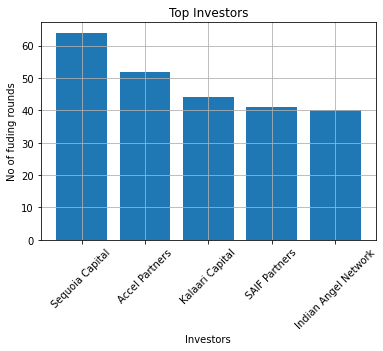

In [15]:
#Graph to visualize top investors
plt.title('Top Investors')
plt.ylabel('No of fuding rounds')
plt.xlabel('Investors')
plt.grid()
plt.bar([i[0] for i in l],[i[1] for i in l])
plt.xticks(rotation=45)
plt.show()

In [16]:
for i in l:
    print(i[0],i[1])

Sequoia Capital 64
Accel Partners 52
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


Conclusion: The above mentioned investors are more likely to fund a startup hence they should be contacted for the same.

# 3. Top Investors in different startups


Aim: Unlike the previous problem, determine the top 5 investors who have invested maximum number of times in 'different' companies

In [17]:
#Get a copy to the two relevant columns in a new dataframe    Ola, Flipkart, Oyo and Paytm.
df=df_og[['StartupName','InvestorsName']].copy()
df.dropna(inplace=True)

In [18]:
#Consider only those entries which are disclosed 
b_a=df['InvestorsName'].str.contains('undisclosed',case=False)
b_a=np.logical_not(b_a)
df=df[b_a]

In [19]:
#replace all string with Ola, Flipkart, Oyo and Paytm as substring with Ola, Flipkart, Oyo and Paytm.
df.loc[df['StartupName'].str.contains('ola',case=False),'StartupName']='Ola'
df.loc[df['StartupName'].str.contains('flipkart',case=False),'StartupName']='Flipkart'
df.loc[df['StartupName'].str.contains('oyo',case=False),'StartupName']='Oyo'
df.loc[df['StartupName'].str.contains('paytm',case=False),'StartupName']='Paytm'


In [20]:
def concatenate_strings(data):
    ans=''
    for i in data:
        if ans=='':
            ans=ans+i
        else:
            ans=ans+','+i
    return ans

In [21]:
#Group together by startup name investors in multiple rounds (Concatenate Investors name by ',')
Unique_startup_investors=df.groupby('StartupName')['InvestorsName'].apply(concatenate_strings)

# for n in Unique_startup_investors.index:
#     print(n,Unique_startup_investors[n])

In [22]:
d={}
def add_to_dict(s):
    #Get all investors name which are present as a comma-separated list
    l=s.split(',')
    temp=set()  #A set to store unique investors name
    for name in l:
        name=name.strip()
        if name=='':
            continue
        if not(name in temp):
            temp.add(name)
            d[name]=d.get(name,0)+1

In [23]:
#Update dictionary to count number of investments
Unique_startup_investors.apply(add_to_dict)
pass

In [24]:
l=sorted(d.items(),key=lambda x:x[1],reverse=True)       #explain this fuction

Top five investors that have applied to different startups are:

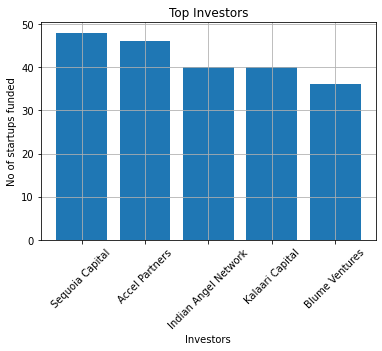

In [25]:
#Graph to visualize contribution of top startups
plt.title('Top Investors')
plt.xlabel('Investors')
plt.ylabel('No of startups funded')
plt.xticks(rotation=45)
plt.bar([l[i][0] for i in range(5)],[l[i][1] for i in range(5)])
plt.grid()
plt.show()

In [26]:
for i in range(5):
    print(l[i][0],l[i][1])

Sequoia Capital 48
Accel Partners 46
Indian Angel Network 40
Kalaari Capital 40
Blume Ventures 36


Conclusion: Unlike our previous list, we know these investors have been most active in funding different startups hence these can be potetial investors for out startup too

# 4. Top Investors under 'Crowd' or 'Seed' Fuding

Aim: Finding the top 5 investors who have invested in a 'different' number of startups and their investment type is Crowd funding or Seed Funding since for a new startup we look for these fundings.


In [27]:
#Get a dataframe with the useful columns
Funds=df_og[['StartupName','InvestmentType','InvestorsName']].copy()
Funds.dropna(inplace=True)

In [28]:
#Consider only those entries which are disclosed 
b_a=Funds['InvestorsName'].str.contains('undisclosed',case=False)
b_a=np.logical_not(b_a)
Funds=Funds[b_a]

In [29]:
#Clean the spelling errors for Seed Funding and Crowd Funding 
Funds.loc[Funds['InvestmentType'].str.contains('seed',case=False),'InvestmentType']='Seed Funding'
Funds.loc[Funds['InvestmentType'].str.contains('crowd',case=False),'InvestmentType']='Crowd Funding'
# Funds.loc[Funds['InvestmentType'].str.contains('private',case=False),'InvestmentType']='Private Equity'
# Funds.loc[Funds['InvestmentType'].str.contains('debt',case=False),'InvestmentTye']='Debt Funding'


In [30]:
#Since we are only concerned about investments of Seed and Crowd type, let us drop the other rows
b_a=(Funds['InvestmentType']=='Crowd Funding') | (Funds['InvestmentType']=='Seed Funding')
Funds=Funds[b_a]

In [31]:
#Cleaning Startups names
Funds.loc[Funds['StartupName'].str.contains('ola',case=False),'StartupName']='Ola'
Funds.loc[Funds['StartupName'].str.contains('flipkart',case=False),'StartupName']='Flipkart'
Funds.loc[Funds['StartupName'].str.contains('oyo',case=False),'StartupName']='Oyo'
Funds.loc[Funds['StartupName'].str.contains('paytm',case=False),'StartupName']='Paytm'

In [32]:
d={}
def add_to_dict(s):
    #Get all investors name which are present as a comma-separated list
    l=s.split(',')
    temp=set()  #A set to store unique investors name
    for name in l:
        name=name.strip()
        if name=='':
            continue
        if not(name in temp):
            temp.add(name)
            d[name]=d.get(name,0)+1

In [33]:
Unique_startup_Investors=Funds.groupby('StartupName')['InvestorsName'].apply(concatenate_strings)

#update dictionary to hold frequency of investors investing in unique startups
Unique_startup_Investors.apply(add_to_dict)
pass

In [34]:
#sort the dictionary to obtain top 5 investors
l=sorted(d.items(),key=lambda x:x[1],reverse=True)[:5]

Top Five Investors under Crowd Funding or Seed Funding are

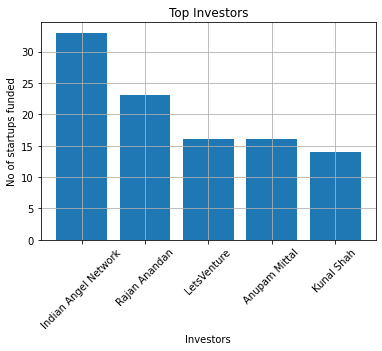

In [35]:
#Graph to visualize contribution of top startups
plt.title('Top Investors')
plt.xlabel('Investors')
plt.ylabel('No of startups funded')
plt.xticks(rotation=45)
plt.bar([i[0] for i in l],[i[1] for i in l])
plt.grid()
plt.show()

In [36]:
for i in l:
    print(i[0])

Indian Angel Network
Rajan Anandan
LetsVenture
Anupam Mittal
Kunal Shah


Conclusion: The investors mentioned above are more likely to invest in a new startup. This list can be useful in the initial stages of a startup.

# 5. Top Investors for 'Private Equity'

Aim: Finding the top 5 investors who have invested in a different number of startups and their investment type is Private Equity to facilitate new investment in a stable startup.

In [37]:
#Get a dataframe with the useful columns
Funds=df_og[['StartupName','InvestmentType','InvestorsName']].copy()
Funds.dropna(inplace=True)

In [38]:
#Consider only those entries which are disclosed 
b_a=Funds['InvestorsName'].str.contains('undisclosed',case=False)
b_a=np.logical_not(b_a)
Funds=Funds[b_a]

In [39]:
#Clean the spelling errors for Private Equity
Funds.loc[Funds['InvestmentType'].str.contains('private',case=False),'InvestmentType']='Private Equity'

In [40]:
#Since we are only concerned about investments under 'Private Equity', let us drop the other rows
b_a=(Funds['InvestmentType']=='Private Equity') 
Funds=Funds[b_a]

In [41]:
#Cleaning Startups names
Funds.loc[Funds['StartupName'].str.contains('ola',case=False),'StartupName']='Ola'
Funds.loc[Funds['StartupName'].str.contains('flipkart',case=False),'StartupName']='Flipkart'
Funds.loc[Funds['StartupName'].str.contains('oyo',case=False),'StartupName']='Oyo'
Funds.loc[Funds['StartupName'].str.contains('paytm',case=False),'StartupName']='Paytm'

In [42]:
d={}
def add_to_dict(s):
    #Get all investors name which are present as a comma-separated list
    l=s.split(',')
    temp=set()  #A set to store unique investors name
    for name in l:
        name=name.strip()
        if name=='':
            continue
        if not(name in temp):
            temp.add(name)
            d[name]=d.get(name,0)+1

In [43]:
Unique_startup_Investors=Funds.groupby('StartupName')['InvestorsName'].apply(concatenate_strings)

#update dictionary to hold frequency of investors investing in unique startups
Unique_startup_Investors.apply(add_to_dict)
pass

In [44]:
#sort the dictionary to obtain top 5 investors
l=sorted(d.items(),key=lambda x:x[1],reverse=True)[:5]

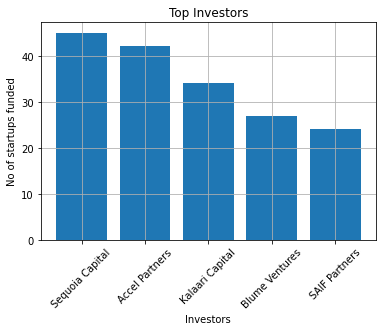

In [45]:
#Graph to visualize contribution of top startups
plt.title('Top Investors')
plt.xlabel('Investors')
plt.ylabel('No of startups funded')
plt.xticks(rotation=45)
plt.bar([l[i][0] for i in range(5)],[l[i][1] for i in range(5)])
plt.grid()
plt.show()

In [46]:
for i in l:
    print(i[0])

Sequoia Capital
Accel Partners
Kalaari Capital
Blume Ventures
SAIF Partners


Conclusion: These investors are more likely to fund a more stable startup. This list is useful in the later stages of our startup